In [181]:
import pandas as pd
import numpy as np
import pipe
from pipe import where
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew, kurtosis

In [182]:
# Tools
def range(series):
    return series.max() - series.min()

In [183]:
# Loading the data and taking a brief overview
data = pd.read_csv('./jobs_in_data.csv')
data = pd.DataFrame(data)
data.info() # We can see there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [184]:
print('Looking at this info spread we can see that there are no null values')

Looking at this info spread we can see that there are no null values


In [185]:
# Understanding the time frame of this data
type(data.work_year)
print('The year span is' , range(data.work_year) , 'starting from' , data.work_year.min() )

The year span is 3 starting from 2020


In [186]:
#Looking at the 5 num description for salaries across the world
print('The mean is',np.floor(np.mean(data.salary_in_usd)), 
      '\nThe median is' , np.median(data.salary_in_usd), 
      '\nThe standard deviation is ', np.floor(np.std(data.salary_in_usd)),
      '\nThe lower fence is', data.salary_in_usd.quantile(0.25),
      '\nThe upper fence is', data.salary_in_usd.quantile(0.75)
     )

The mean is 150299.0 
The median is 143000.0 
The standard deviation is  63173.0 
The lower fence is 105700.0 
The upper fence is 186723.0


Text(0.5, 1.0, 'Salaries in USD Across the World')

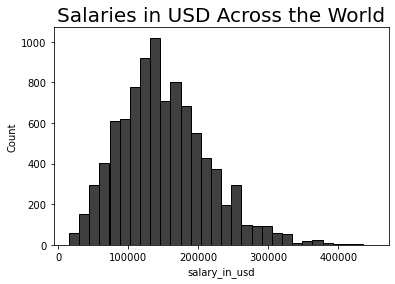

In [187]:
# Getting a visual of the salary spread across the world
sns.histplot(data,
             x= "salary_in_usd",
             bins= 30,
             color='black',
            )
plt.title("Salaries in USD Across the World", fontsize = 20)

In [188]:
# Comment 1
print('So after a quick overview at the data, there are a few things of note: it is normalish (I am not worried about going further are the moment since I am going to narrow the data soon), there is a very interesting second bump near the 400k mark, there is a dip near the center of the distribution and the left side is pretty steep. So far we have included the world, but I would like to look at salaries in the United States')

So after a quick overview at the data, there are a few things of note: it is normalish (I am not worried about going further are the moment since I am going to narrow the data soon), there is a very interesting second bump near the 400k mark, there is a dip near the center of the distribution and the left side is pretty steep. So far we have included the world, but I would like to look at salaries in the United States


In [189]:
# Filtering the data to see only the United States
data.employee_residence.unique() # Checking to make sure there are no other spelling of the United States
filtered_data = data[data['employee_residence'] == 'United States']
filtered_data.info() # Again we can see there are no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8086 entries, 1 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           8086 non-null   int64 
 1   job_title           8086 non-null   object
 2   job_category        8086 non-null   object
 3   salary_currency     8086 non-null   object
 4   salary              8086 non-null   int64 
 5   salary_in_usd       8086 non-null   int64 
 6   employee_residence  8086 non-null   object
 7   experience_level    8086 non-null   object
 8   employment_type     8086 non-null   object
 9   work_setting        8086 non-null   object
 10  company_location    8086 non-null   object
 11  company_size        8086 non-null   object
dtypes: int64(3), object(9)
memory usage: 821.2+ KB


In [190]:
#Looking at the 5 num description for salaries for the united states
print('The mean is',np.floor(np.mean(filtered_data.salary_in_usd)), 
      '\nThe median is' , np.median(filtered_data.salary_in_usd), 
      '\nThe standard deviation is ', np.floor(np.std(filtered_data.salary_in_usd)),
      '\nThe lower fence is', filtered_data.salary_in_usd.quantile(0.25),
      '\nThe upper fence is', filtered_data.salary_in_usd.quantile(0.75),
     )

The mean is 158586.0 
The median is 150000.0 
The standard deviation is  59225.0 
The lower fence is 117625.0 
The upper fence is 192000.0


Text(0.5, 1.0, 'Salaries in USD in the US')

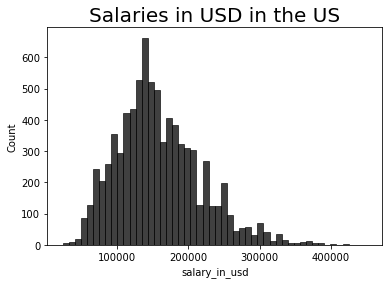

In [191]:
# Getting a visual of the salary spread across the world
sns.histplot(filtered_data,
             x= "salary_in_usd",
             bins= 50,
             color='black',
            )
plt.title("Salaries in USD in the US", fontsize = 20)

In [192]:
# Comment 2
print('So after a quick overview at the data, there are a few things of note: it is normalish, there is a very interesting second bump near the 400k mark, there seems to be a standard price of someone that works in data is 150,000 USD, it has a tail towards the right, and has a steep climb on the left. I would like to see how normal this distribution is as it will influence my analysis of it.')

So after a quick overview at the data, there are a few things of note: it is normalish, there is a very interesting second bump near the 400k mark, there seems to be a standard price of someone that works in data is 150,000 USD, it has a tail towards the right, and has a steep climb on the left. I would like to see how normal this distribution is as it will influence my analysis of it.


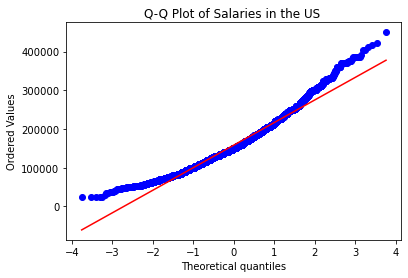

Skewness: 0.6211916296018803
Kurtosis: 0.5662974027614927


In [193]:
stats.probplot(filtered_data['salary_in_usd'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Salaries in the US ")
plt.show()



# Calculate skewness
skewness = skew(data['salary_in_usd'])

# Calculate kurtosis
kurt = kurtosis(data['salary_in_usd'])

print("Skewness:", skewness)
print("Kurtosis:", kurt)

In [194]:
# Comment 3
print('So by looking at the Q-Q plot I know that it is not Guassian, which is unfortunate but manageable. I took a look at the skewness(width/pancakifcation) and Kurtosis (height/spaghettification) to understand how to properly classify it. \nSince skew is positive we know its right skewed,\nSince kurtosis is positive we know there are more outliers than normal. \nIn other words its wide and leaning to the right. This is important to know as it will influence what kind of tests and methods we can and cannot use on this data. In context, this means that there are more people getting paid higher than 150000 USD than not. I would like t explore the data a little further, specifically starting to look into different career paths.')

So by looking at the Q-Q plot I know that it is not Guassian, which is unfortunate but manageable. I took a look at the skewness(width/pancakifcation) and Kurtosis (height/spaghettification) to understand how to properly classify it. 
Since skew is positive we know its right skewed,
Since kurtosis is positive we know there are more outliers than normal. 
In other words its wide and leaning to the right. This is important to know as it will influence what kind of tests and methods we can and cannot use on this data. In context, this means that there are more people getting paid higher than 150000 USD than not. I would like t explore the data a little further, specifically starting to look into different career paths.


In [195]:
# Taking a look at the different job categories that interest me
print(filtered_data.job_category.unique())

['Data Architecture and Modeling' 'Data Science and Research'
 'Machine Learning and AI' 'Data Engineering' 'Data Analysis'
 'Leadership and Management' 'BI and Visualization'
 'Data Management and Strategy' 'Data Quality and Operations'
 'Cloud and Database']


In [196]:
print('I am really just interested in the categories of Data Analysis, Data Engineering, Machine Learning and AI, Data Science and Research')

I am really just interested in the categories of Data Analysis, Data Engineering, Machine Learning and AI, Data Science and Research


In [197]:
# Filtering the data to see only entries in the categories of Data Analysis, Data Engineering, Machine Learning and AI, Data Science and Research in the United States
filtered_data = filtered_data[(filtered_data['job_category'] == 'Data Analysis') | (filtered_data['job_category'] == 'Data Engineering') | (filtered_data['job_category'] == 'Machine Learning and AI') | (filtered_data['job_category'] == 'Data Science and Research')]
filtered_data.info() # Again we can see there are no null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7011 entries, 3 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           7011 non-null   int64 
 1   job_title           7011 non-null   object
 2   job_category        7011 non-null   object
 3   salary_currency     7011 non-null   object
 4   salary              7011 non-null   int64 
 5   salary_in_usd       7011 non-null   int64 
 6   employee_residence  7011 non-null   object
 7   experience_level    7011 non-null   object
 8   employment_type     7011 non-null   object
 9   work_setting        7011 non-null   object
 10  company_location    7011 non-null   object
 11  company_size        7011 non-null   object
dtypes: int64(3), object(9)
memory usage: 712.1+ KB


In [198]:
#Looking at the 5 num description for salaries of a select catagories of jobs in the united states
print('The mean is',np.floor(np.mean(filtered_data.salary_in_usd)), 
      '\nThe median is' , np.median(filtered_data.salary_in_usd), 
      '\nThe standard deviation is ', np.floor(np.std(filtered_data.salary_in_usd)),
      '\nThe lower fence is', filtered_data.salary_in_usd.quantile(0.25),
      '\nThe upper fence is', filtered_data.salary_in_usd.quantile(0.75),
     )

The mean is 160759.0 
The median is 151410.0 
The standard deviation is  59573.0 
The lower fence is 120000.0 
The upper fence is 196000.0


Text(0.5, 1.0, 'Salaries in USD in the US')

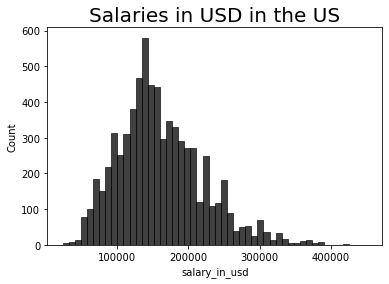

In [201]:
# Getting a visual of the salary spread of a select catagories of jobs in across the world
sns.histplot(filtered_data,
             x= "salary_in_usd",
             bins= 50,
             color='black',
            )
plt.title("Salaries in USD in the US", fontsize = 20)


In [203]:
# Taking a look at the different job categories that interest me
print(filtered_data.job_title.unique())

['Data Scientist' 'Machine Learning Researcher' 'Data Engineer'
 'Machine Learning Engineer' 'Data Analyst' 'Applied Scientist'
 'Research Scientist' 'Research Analyst' 'Research Engineer'
 'Data Science Engineer' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Data Science Consultant' 'ML Engineer'
 'Data Science Director' 'Machine Learning Modeler'
 'Data Integration Engineer' 'Data Science Practitioner' 'AI Developer'
 'AI Architect' 'Data Science Manager' 'Decision Scientist'
 'Financial Data Analyst' 'Computer Vision Engineer'
 'Director of Data Science' 'ETL Developer'
 'Machine Learning Infrastructure Engineer' 'Principal Data Scientist'
 'Data Science Lead' 'Data Infrastructure Engineer'
 'Machine Learning Software Engineer' 'Head of Machine Learning'
 'Business Data Analyst' 'Staff Machine Learning Engineer'
 'Staff Data Scientist' 'Deep Learning Engineer' 'Head of Data Science'
 'Managing Director Data Science' 'Software Data Engineer'
 'Compliance Data Analyst'